<a href="https://colab.research.google.com/github/SaiPranathi005/Deep-Learning-Lab/blob/main/DL_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0


11490434/11490434 [==============================] - 1s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (48000, 28, 28)
Validation data shape: (12000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattens the 28x28 pixels into a 1D array
    Dense(128, activation='relu'),  # 128 neurons, ReLU activation
    Dense(10, activation='softmax') # 10 output neurons for 10 classes (digits 0-9), softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val))


Epoch 1/150
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2825 - accuracy: 0.9200 - val_loss: 0.1646 - val_accuracy: 0.9533
Epoch 2/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1286 - accuracy: 0.9629 - val_loss: 0.1158 - val_accuracy: 0.9659
Epoch 3/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0882 - accuracy: 0.9736 - val_loss: 0.1003 - val_accuracy: 0.9697
Epoch 4/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9809 - val_loss: 0.0894 - val_accuracy: 0.9740
Epoch 5/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0939 - val_accuracy: 0.9717
Epoch 6/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0388 - accuracy: 0.9887 - val_loss: 0.0884 - val_accuracy: 0.9739
Epoch 7/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0870 - val_a

313/313 [==============================] - 2s 4ms/step
Accuracy: 0.9801
Precision: 0.9801131267067366
Recall: 0.9801
F1 Score: 0.9800971995978515


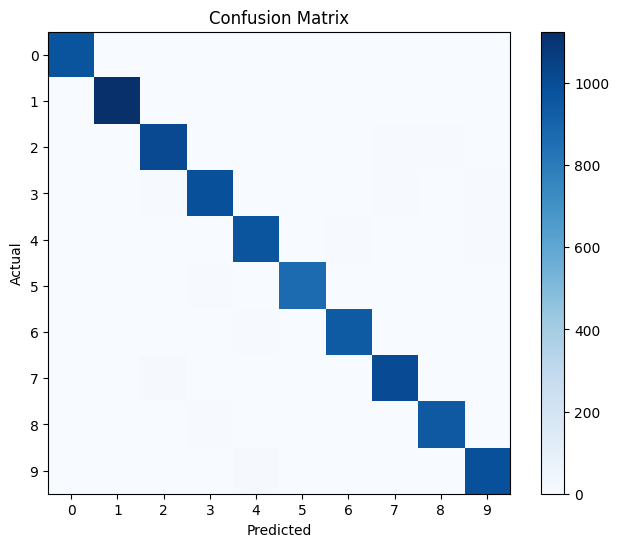

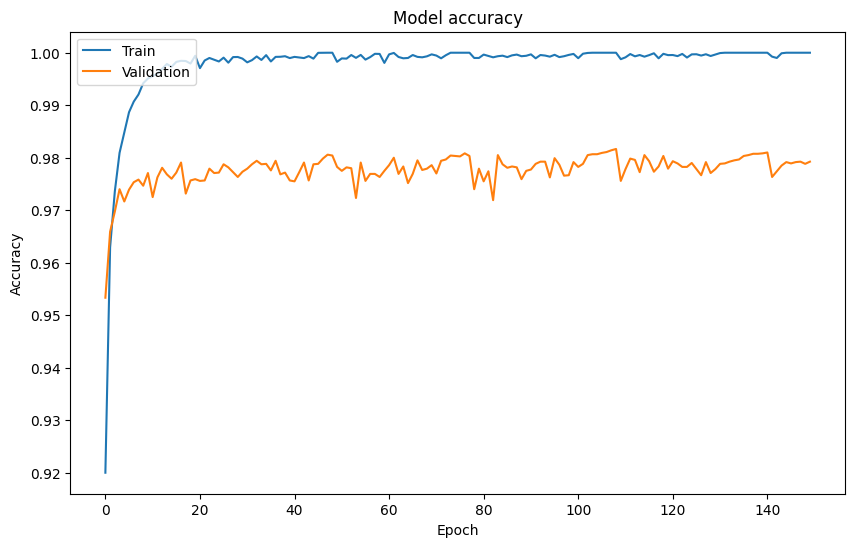

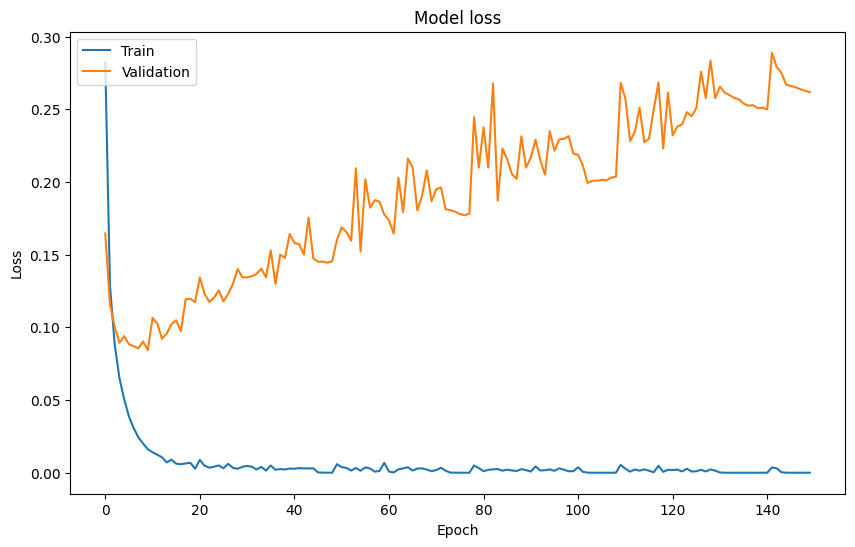

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Evaluate on test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
